In [1]:
import tensorflow as tf
print(tf.__version__)


2.2.0


In [2]:
import tensorflow_datasets as tfds

imdb,info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

In [3]:
train_data, test_data = imdb['train'], imdb['test']

train_data = train_data.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))
test_data   = test_data.map(lambda x_text, x_label: (x_text, tf.expand_dims(x_label, -1)))

In [4]:
tokenizer = info.features['text'].encoder

In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset  = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [6]:
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

history = model.fit(train_dataset, epochs=num_epochs, validation_data=test_dataset)

Epoch 1/10
105/391 [=======>......................] - ETA: 15:20 - loss: 0.6253 - accuracy: 0.6262

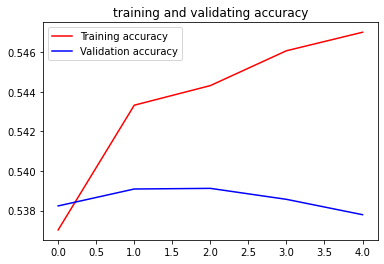

<Figure size 432x288 with 0 Axes>

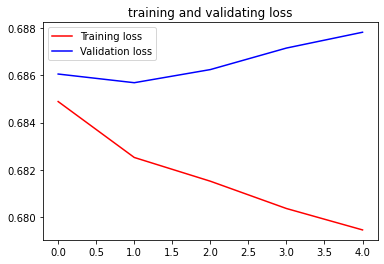

In [11]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('training and validating accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('training and validating loss')
plt.legend(loc=0)

In [12]:
layer = model.layers[0]
weights = layer.get_weights()[0]
print(weights.shape)





(8185, 64)
